# String problem  (continued)

## Jacobian 

In python we can use this function `Jacobian(f,x, h=1e-5)`. This computes the Jacobian matrix (numerically, i.e. uses the centeral difference algorithm)

$J=\frac{\partial \textbf{f}}{\partial \textbf{x}}$ in a matrix/vector form, explicitly written what we have is

$J_{ij}=\frac{\partial f_i(x_1,x_2,\ldots,x_j,\ldots)}{\partial x_j}$ which can be written as
$J_{ij}\approx\frac{f_i(x_1,x_2,\ldots,x_j+\frac{h}{2})-f_i(x_1,x_2,\ldots,x_j-\frac{h}{2},\ldots)}{ h}$

In [92]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
def Jacobian_Matrix(f,x,h=1e-5):
    J=np.zeros((len(f(x)), len(x)),dtype=np.float64)
    hvec=np.zeros_like(x,dtype=np.float64)
    for j in range(len(x)):
        hvec *= 0
        hvec[j] = 0.5*h
        J[:,j]=(f(x+hvec)-f(x-hvec))/(h) # CAUTION! mistyped h instead of x during class
    return J

# Checking the Jacobian

$g(x)=\begin{pmatrix}x_0^2-x_1 \\ x_0\end{pmatrix}$

Analytically you see that 

$J=\begin{pmatrix}\frac{\partial g_i }{\partial x_j}\end{pmatrix}=\begin{pmatrix}\frac{\partial g_0 }{\partial x_0}  & \frac{\partial g_0 }{\partial x_1}\\ \frac{\partial g_1 }{\partial x_0}  & \frac{\partial g_1 }{\partial x_1}\end{pmatrix}=\begin{pmatrix}2x_0  & -1\\ 1 & 0\end{pmatrix}$


Given a test vector, call it $\textbf{x}_{test}=(1,0)$, what is the numerical answer for Jacobian $J(\textbf{x}_{test})?$

It should yield $J(\textbf{x}_{test})=\begin{pmatrix}2  & -1\\ 1 & 0\end{pmatrix}$ we should get the same answer when you check.

In [94]:
def g(x):
    return np.array([
        x[0]**2-x[1],x[0]])
x_test =np.array([1,0])
J = Jacobian_Matrix(g,x_test)
print(J)

[[ 2. -1.]
 [ 1.  0.]]


# From Previous Lecture (Lecture 9)

In [95]:
# Given parameters
import numpy as np
W = np.array([10, 25])
L = np.array([9, 3, 5, 4 ])

def func_masses(x,L,W):
    return np.array ([-x[6]*x[3]+x[7]*x[4],
                     x[6]*x[0]-x[7]*x[1]-W[0],
                     -x[7]*x[4]+x[8]*x[5],
                     x[7]*x[1]+x[8]*x[2]-W[1],
                     L[1]*x[3]+L[2]*x[4]+L[3]*x[5]-L[0],
                     -L[1]*x[0]-L[2]*x[1]+L[3]*x[2],
                     x[0]**2 + x[3]**2-1,
                     x[1]**2 + x[4]**2-1,
                    x[2]**2 + x[5]**2-1,
                     ])

def func_LW(x, L=L,W=W):
    return func_masses(x,L,W)

In [96]:
# Initial values

x0 = np.array([1.5,.5,.5,.5,.5,.5,1,1,1])

In [97]:
def plot_masses(x,L,W,**kwargs):
    kwargs.setdefault('linestyle','-')
    kwargs.setdefault('marker','o')
    kwargs.setdefault('linewidth',1)
    
    ax = kwargs.pop('ax', None)
    if ax is None:
        ax=plt.subplot(111)# play with this number change it
        
    r0 = np.array([0,0])
    r1 = r0 + np.array([L[0],0])
    rod = np.transpose([r0,r1])
    
    L1 = r0 + np.array([L[1]*x[3],-L[1]*x[0]])
    L2 = L1 + np.array([L[2]*x[4],-L[2]*x[1]])
    L3 = L2 + np.array([L[3]*x[5],L[3]*x[2]])
    
    string = np.transpose([r0,L1,L2,L3])
    
    ax.plot(rod[0],rod[1], color="black", marker="d", linewidth=3)
    ax.plot(string[0],string[1], **kwargs)
    ax.set_aspect(1)
    return ax

In [98]:
J0 = Jacobian_Matrix(func_LW,x0)
print(J0)

[[ 0.   0.   0.  -1.   1.   0.  -0.5  0.5  0. ]
 [ 1.  -1.   0.   0.   0.   0.   1.5 -0.5  0. ]
 [ 0.   0.   0.   0.  -1.   1.   0.  -0.5  0.5]
 [ 0.   1.   1.   0.   0.   0.   0.   0.5  0.5]
 [ 0.   0.   0.   3.   5.   4.   0.   0.   0. ]
 [-3.  -5.   4.   0.   0.   0.   0.   0.   0. ]
 [ 3.   0.   0.   1.   0.   0.   0.   0.   0. ]
 [ 0.   1.   0.   0.   1.   0.   0.   0.   0. ]
 [ 0.   0.   1.   0.   0.   1.   0.   0.   0. ]]


In [99]:
J0.shape

(9, 9)

# Newton-Raphson root finding method

Is a trial and error method. Solves $f(x)=0$

In [100]:
def Newton_Raphson(f,x,Nmax=100,tol=1e-8,h=1e-5):
    x=x.copy()
    for istep in range(Nmax):
        fx=f(x)
        if np.linalg.norm(fx)< tol:
            break
        J = Jacobian_Matrix(f,x,h=h)
        Delta_x = np.linalg.solve(J,-fx)
        x += Delta_x
    else:
        raise RuntineError (f"Newton_Raphson method didn't find root")
    return x

In [101]:
x = Newton_Raphson(func_LW,x0)
print(x0)
print(x)

[1.5 0.5 0.5 0.5 0.5 0.5 1.  1.  1. ]
[ 0.71685854  0.25412962  0.85530593  0.69721864  0.96717017  0.51812331
 18.73851365 13.50831685 25.21569848]


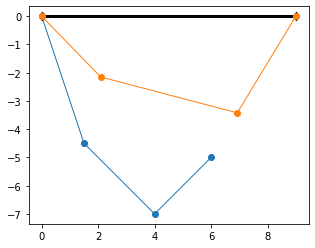

In [102]:
# Plot the results (the initial configuration and the solution)

ax = plot_masses(x0,L,W)
ax = plot_masses(x,L,W, ax=ax)